In [3]:
import pandas as pd

df = pd.read_csv("../data/AAPL_with_indicators.csv", index_col=0, parse_dates=True)
df = df.dropna()  # ważne – usuwamy wiersze z NaN po rolling()

df.head(10)


C:\Users\olafg\AppData\Local\Temp\ipykernel_21948\3925189285.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/AAPL_with_indicators.csv", index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume,daily_return,volatility,SMA_20,EMA_20,RSI
Price,,,,,,,,,,
2020-01-30,78.41036224365234,78.46362551493233,77.17078871761717,77.60415772537527,126743200,-0.001449,1.108179,75.545420,75.919594,63.879204
2020-01-31,74.93374633789062,78.12225762194025,74.63837863048332,77.69857485901245,199588400,-0.044339,1.130043,75.656304,75.825704,49.368818
2020-02-03,74.72795104980469,75.89731214570682,73.16879799630816,73.67237193822604,173788400,-0.002746,1.237593,75.792246,75.721156,42.987482
2020-02-04,77.19500732421875,77.3862719133486,75.93122176752728,76.33795548064964,136616400,0.033014,1.229224,76.022850,75.861523,54.739596
2020-02-05,77.82447052001953,78.62583557722229,77.21920945636545,78.32562106551018,118826800,0.008154,1.217206,76.301997,76.048470,57.618723
2020-02-06,78.73478698730469,78.73721039613278,77.53637437960353,78.09563507421905,105425600,0.011697,1.316229,76.568554,76.304310,57.529141
2020-02-07,77.66455078125,78.4823777284415,77.17191276643283,78.23241868458796,117684000,-0.013593,1.329534,76.703642,76.433856,51.533720
2020-02-10,78.03343963623047,78.03343963623047,76.1648155367922,76.24489635857795,109348800,0.004750,1.354591,76.848700,76.586198,54.317895
2020-02-11,77.5626449584961,78.60374012100387,77.34423530217373,78.53093937088862,94323200,-0.006033,1.359830,76.889961,76.679193,51.982021


In [4]:
for lag in range(1, 6):  # 5 dni opóźnienia
    df[f"lag_{lag}"] = df["Close"].shift(lag)

for col in ["Close", "Open", "High", "Low", "Volume"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.dtypes)
# print(df.head(3))


Close           float64
High            float64
Low             float64
Open            float64
Volume            int64
daily_return    float64
volatility      float64
SMA_20          float64
EMA_20          float64
RSI             float64
lag_1            object
lag_2            object
lag_3            object
lag_4            object
lag_5            object
dtype: object


In [5]:
df["rolling_mean_5"] = df["Close"].rolling(window=5).mean()
df["rolling_std_5"] = df["Close"].rolling(window=5).std()
df["lag_7"] = df["Close"].shift(7)
# MACD
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]

# Momentum
df["momentum_3"] = df["Close"] - df["Close"].shift(3)
df["momentum_5"] = df["Close"] - df["Close"].shift(5)

lag_cols = [f"lag_{i}" for i in range(1, 6)]
df[lag_cols] = df[lag_cols].astype(float)


# Potem nie zapomnij:
df = df.dropna()


print(df.dtypes)


Close             float64
High              float64
Low               float64
Open              float64
Volume              int64
daily_return      float64
volatility        float64
SMA_20            float64
EMA_20            float64
RSI               float64
lag_1             float64
lag_2             float64
lag_3             float64
lag_4             float64
lag_5             float64
rolling_mean_5    float64
rolling_std_5     float64
lag_7             float64
EMA_12            float64
EMA_26            float64
MACD              float64
momentum_3        float64
momentum_5        float64
dtype: object


In [6]:
# df["target"] = df["Close"].shift(-1)  # lub .pct_change().shift(-1) dla % zmiany
# df["target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
# df["target"] = df["Close"].shift(-1) - df["Close"]
df["target"] = df["Close"].shift(-1)

df = df.dropna()  # bardzo ważne – musi być po shift
df

,Close,High,Low,Open,Volume,daily_return,volatility,SMA_20,EMA_20,RSI,...,lag_5,rolling_mean_5,rolling_std_5,lag_7,EMA_12,EMA_26,MACD,momentum_3,momentum_5,target
Price,,,,,,,,,,,,,,,,,,,,,
2020-02-10,78.033440,78.033440,76.164816,76.244896,109348800,0.004750,1.354591,76.848700,76.586198,54.317895,...,74.727951,77.890451,0.563998,78.410362,77.698523,77.903339,-0.204816,0.208969,3.305489,77.562645
2020-02-11,77.562645,78.603740,77.344235,78.530939,94323200,-0.006033,1.359830,76.889961,76.679193,51.982021,...,77.195007,77.963979,0.466143,74.933746,77.677618,77.878102,-0.200484,-1.172142,0.367638,79.404579
2020-02-12,79.404579,79.409430,78.014026,78.014026,113730400,0.023748,1.491295,77.075129,76.938753,55.958448,...,77.824471,78.280000,0.778729,74.727951,77.943305,77.991175,-0.047870,1.740028,1.580109,78.839142
2020-02-13,78.839142,79.166760,78.470272,78.674122,94747600,-0.007121,1.546790,77.248246,77.119743,54.899586,...,78.734787,78.300871,0.795190,77.195007,78.081126,78.053987,0.027139,0.805702,0.104355,78.858566
2020-02-14,78.858566,79.108525,78.348939,78.807598,80113600,0.000246,1.395117,77.375125,77.285345,62.796134,...,77.664551,78.539674,0.733194,77.824471,78.200732,78.113586,0.087146,1.295921,1.194016,77.414597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,0.003065,4.060646,244.757892,245.185061,73.865382,...,250.764282,251.938998,3.132510,247.687683,248.778804,243.013334,5.765470,7.212082,4.225372,257.916443
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478,4.503391,246.023002,246.397574,76.180657,...,253.201599,252.881967,4.151512,247.857483,250.184595,244.117268,6.067327,8.400787,4.714844,258.735504
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176,4.751959,247.219685,247.572615,76.812079,...,247.777573,255.073553,3.644654,250.764282,251.500119,245.200101,6.300019,4.524994,10.957932,255.309296


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Close", "target", "High", "Low", "Open", "Volume"])
y = df["target"]

split_idx = int(len(df) * 0.7)
X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

# print(y_test.head(10))
# print(y_test.index)



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Regresja liniowa
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


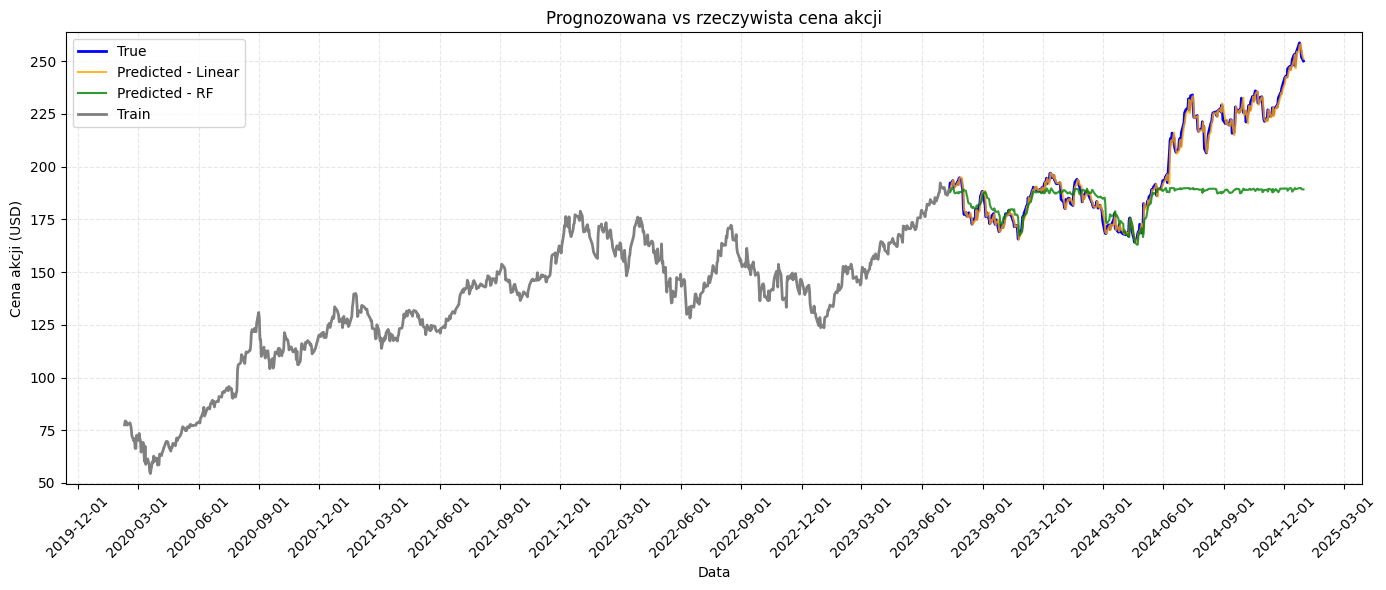

In [9]:
# Upewnij się, że wszystko ma ten sam rozmiar
min_len = min(len(y_test), len(y_pred_lr), len(y_pred_rf))
y_test_trimmed = y_test.iloc[:min_len]
y_pred_lr_trimmed = pd.Series(y_pred_lr[:min_len], index=y_test_trimmed.index)
y_pred_rf_trimmed = pd.Series(y_pred_rf[:min_len], index=y_test_trimmed.index)

# Tworzymy wyniki jako DataFrame
results = pd.DataFrame({
    "True": y_test_trimmed,
    "Pred_LR": y_pred_lr_trimmed,
    "Pred_RF": y_pred_rf_trimmed,
    "Train": y_train
})

# Upewniamy się, że index to datetime i posortowany
results.index = pd.to_datetime(results.index)
results = results.sort_index()
results = results.astype({"True": float, "Pred_LR": float, "Pred_RF": float})


# 🧠 Tu nie robimy shift, bo już dobrze przewidujemy target = Close.shift(-1)
# więc y_test i predykcje są zsynchronizowane
import matplotlib.pyplot as plt
# Wykres
import matplotlib.dates as mdates

plt.style.use("default")  # reset stylu

plt.figure(figsize=(14, 6))
plt.plot(results.index, results["True"], label="True", linewidth=2, color="blue")
plt.plot(results.index, results["Pred_LR"], label="Predicted - Linear", alpha=0.8, color="orange")
plt.plot(results.index, results["Pred_RF"], label="Predicted - RF", alpha=0.8, color="green")
plt.plot(results.index, results["Train"], label="Train", linewidth=2, color="gray")

plt.title("Prognozowana vs rzeczywista cena akcji")
plt.xlabel("Data")
plt.ylabel("Cena akcji (USD)")

# oś X: format dat
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # co 3 miesiące
plt.xticks(rotation=45)

# oś Y: dopasuj zakres
ymin = min(results[["True", "Pred_LR", "Pred_RF", "Train"]].min()) - 5
ymax = max(results[["True", "Pred_LR", "Pred_RF", "Train"]].max()) + 5
plt.ylim(ymin, ymax)

plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()




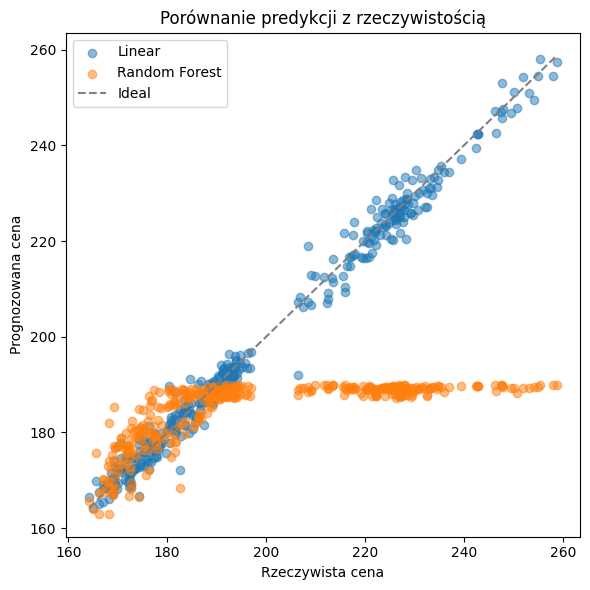

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(results["True"], results["Pred_LR"], alpha=0.5, label="Linear")
plt.scatter(results["True"], results["Pred_RF"], alpha=0.5, label="Random Forest")
plt.plot([results["True"].min(), results["True"].max()],
         [results["True"].min(), results["True"].max()],
         linestyle='--', color='gray', label='Ideal')
plt.xlabel("Rzeczywista cena")
plt.ylabel("Prognozowana cena")
plt.legend()
# plt.grid(True)
plt.title("Porównanie predykcji z rzeczywistością")
plt.tight_layout()
plt.show()


In [11]:
print(results.head(150))

            True  Pred_LR  Pred_RF       Train
Price                                         
2020-02-10   NaN      NaN      NaN   77.562645
2020-02-11   NaN      NaN      NaN   79.404579
2020-02-12   NaN      NaN      NaN   78.839142
2020-02-13   NaN      NaN      NaN   78.858566
2020-02-14   NaN      NaN      NaN   77.414597
...          ...      ...      ...         ...
2020-09-04   NaN      NaN      NaN  110.010658
2020-09-08   NaN      NaN      NaN  114.398590
2020-09-09   NaN      NaN      NaN  110.663956
2020-09-10   NaN      NaN      NaN  109.211067
2020-09-11   NaN      NaN      NaN  112.487389

[150 rows x 4 columns]


In [12]:
import numpy as np

def print_metrics(y_true, y_pred, label):
    print(f"--- {label} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")


--- Linear Regression ---
MAE: 2.025401381144354
RMSE: 2.729841679659599
--- Random Forest ---
MAE: 17.13640910628035
RMSE: 24.948622998567473


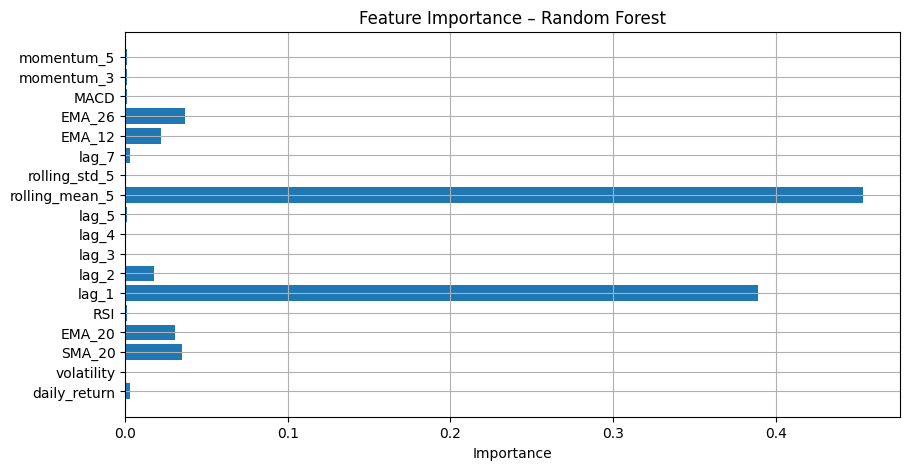

In [13]:


importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance")
plt.grid(True)
plt.show()


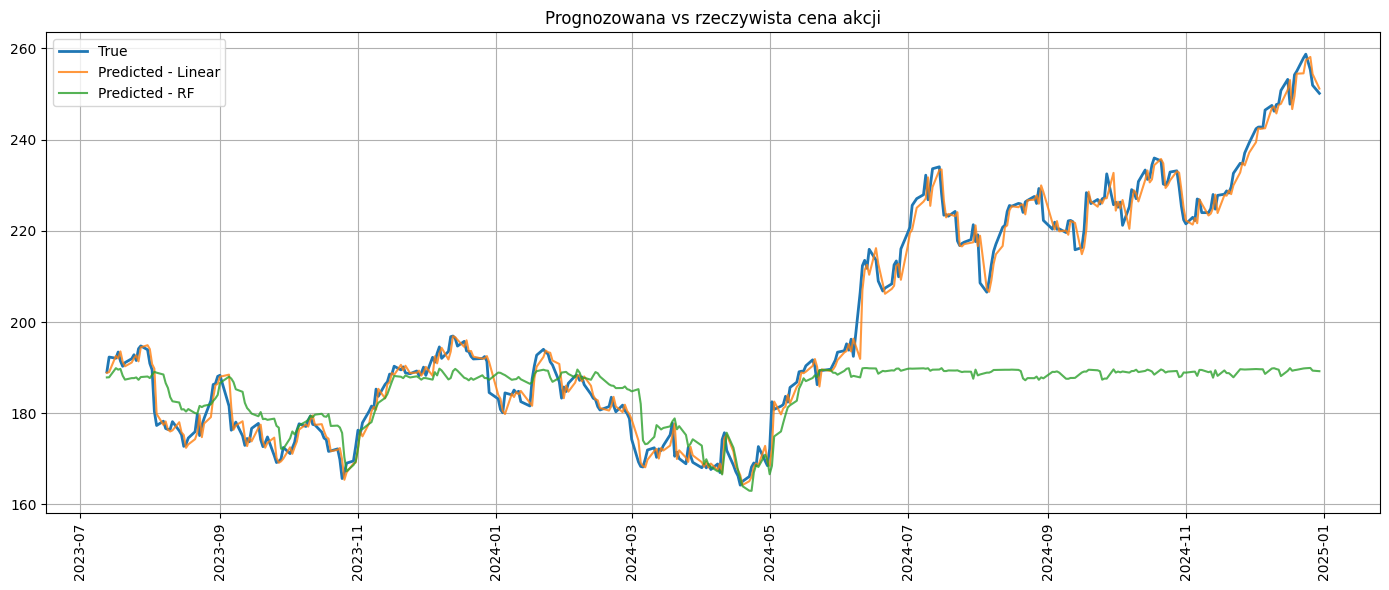

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(results.index, results["True"], label="True", linewidth=2)
plt.plot(results.index, results["Pred_LR"], label="Predicted - Linear", alpha=0.8)
plt.plot(results.index, results["Pred_RF"], label="Predicted - RF", alpha=0.8)
plt.title("Prognozowana vs rzeczywista cena akcji")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [15]:
pd.reset_option("display.max_rows")

results.head(10)

,True,Pred_LR,Pred_RF,Train
Price,,,,
2020-02-10,NaN,NaN,NaN,77.562645
2020-02-11,NaN,NaN,NaN,79.404579
2020-02-12,NaN,NaN,NaN,78.839142
2020-02-13,NaN,NaN,NaN,78.858566
2020-02-14,NaN,NaN,NaN,77.414597
2020-02-18,NaN,NaN,NaN,78.535789
2020-02-19,NaN,NaN,NaN,77.730087
2020-02-20,NaN,NaN,NaN,75.970673
2020-02-21,NaN,NaN,NaN,72.362045
